In [65]:
%matplotlib inline
from rdkit import Chem
from rdkit.Chem import rdMolTransforms
from rdkit.Chem.Draw import IPythonConsole
from psikit import Psikit
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
pk = Psikit()

In [9]:
pk.read_from_smiles("CNS(=O)(=O)CC")

In [10]:
pk.optimize(basis_sets="scf/sto-3g")

Optimizer: Optimization complete!


-711.7748942789913

In [11]:
pk.optimize(basis_sets="B3LYP/6-31G*")

Optimizer: Optimization complete!


-723.0626131232355

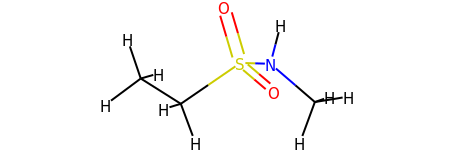

In [12]:
pk.mol

In [13]:
[a.GetSymbol() for a in pk.mol.GetAtoms()]

['C',
 'N',
 'S',
 'O',
 'O',
 'C',
 'C',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H']

In [14]:
conformer = pk.mol.GetConformer(0)

In [26]:
dihedral_energies = []
for dihedral_degree in range(0, 360, 10):
    rdMolTransforms.SetDihedralDeg(conformer, 3, 2, 5, 6, dihedral_degree)
    degy = pk.energy(basis_sets="b3lyp/6-31g*")
    print(dihedral_degree, degy)
    dihedral_energies.append(degy)

0 -723.056921763491
10 -723.0574009035583
20 -723.0583845883023
30 -723.0595485772963
40 -723.0605034078015
50 -723.0609938370956
60 -723.0608832849458
70 -723.0600488840882
80 -723.0585385255836
90 -723.0567086747076
100 -723.0551682176562
110 -723.054408816703
120 -723.0545318226641
130 -723.0554506590202
140 -723.0570179572535
150 -723.0589412650767
160 -723.0607819309749
170 -723.0620693038213
180 -723.0625640298554
190 -723.062178569547
200 -723.0611117138934
210 -723.0596917366915
220 -723.0583669682219
230 -723.0574853343633
240 -723.0572859520408
250 -723.0577599957417
260 -723.058744956759
270 -723.0599360174974
280 -723.0610146943501
290 -723.061727957017
300 -723.0618940554882
310 -723.0614391811523
320 -723.0604675894782
330 -723.0592105713769
340 -723.0579701713469
350 -723.0571320334551


In [28]:
de = np.array(dihedral_energies)

In [67]:
de_kcal = (de - de.min()) * 627.51 # convert hartree -> kcal/mol

In [68]:
de_kcal

array([3.54057857, 3.23991338, 2.62264137, 1.89222664, 1.29306094,
       0.98531166, 1.05468424, 1.57827912, 2.52604419, 3.67429391,
       4.64094611, 5.11747781, 5.04029033, 4.46371133, 3.48021602,
       2.27332113, 1.11828487, 0.31044553, 0.        , 0.2418802 ,
       0.91134279, 1.80239268, 2.63369815, 3.18693221, 3.31204661,
       3.01457945, 2.39650656, 1.64910403, 0.97222352, 0.52464407,
       0.42041562, 0.70585381, 1.3155373 , 2.10432873, 2.88269215,
       3.40863206])

In [69]:
tps = np.array(range(0, 360, 10))

In [70]:
df = pd.DataFrame({"timepoint":tps, "relative_energy":de_kcal})

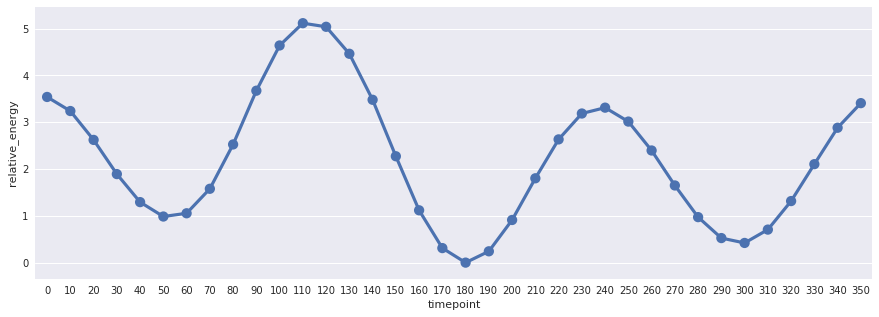

In [71]:
sns.set(rc={"figure.figsize":(15,5)})
g = sns.pointplot(x="timepoint", y="relative_energy",data=df)